In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [21]:
# Load shapefile
gdf = gpd.read_file("cb_2020_us_cousub_500k/cb_2020_us_cousub_500k.shp")

# Check structure
gdf.head()


,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06658, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85914 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.6682, -99.83068 48.6681..."


In [22]:
# Exclude Alaska (02), Hawaii (15), and Puerto Rico (72)
exclude_states = ['02', '15', '72']
gdf_contiguous = gdf[~gdf['STATEFP'].isin(exclude_states)]

# Convert to a consistent CRS 
gdf_contiguous = gdf_contiguous.to_crs(epsg=3857)  


In [ ]:
# Plot Base Map
fig, ax = plt.subplots(figsize=(15, 10))
gdf_contiguous.plot(ax=ax, edgecolor='black', linewidth=0.2, color='lightgray')
ax.set_title("Base Map of Contiguous U.S. County Subdivisions", fontsize=16)
plt.axis('off')
plt.savefig("Fisher_Bachman-Rhodes_MapBase.png", dpi=300)
plt.show()


## Visualization 1: Histogram of Land Area

**Purpose and Rationale**  
This histogram displays the distribution of land area (in square kilometers) across county subdivisions in the contiguous United States. It helps reveal whether most areas are small or if large subdivisions are common.

**Insights and Interpretation:**
1. Most subdivisions fall below 500 sq km in land area.
2. The distribution is highly right-skewed, with a small number of extremely large subdivisions.
3. Smaller subdivisions are far more frequent, suggesting a clustering of administrative units around lower land sizes.

**Interpretation:**  
This indicates that county subdivisions tend to be small in land area, with a few large outliers. These outliers may correspond to sparsely populated or rural areas where administrative divisions cover much larger regions.


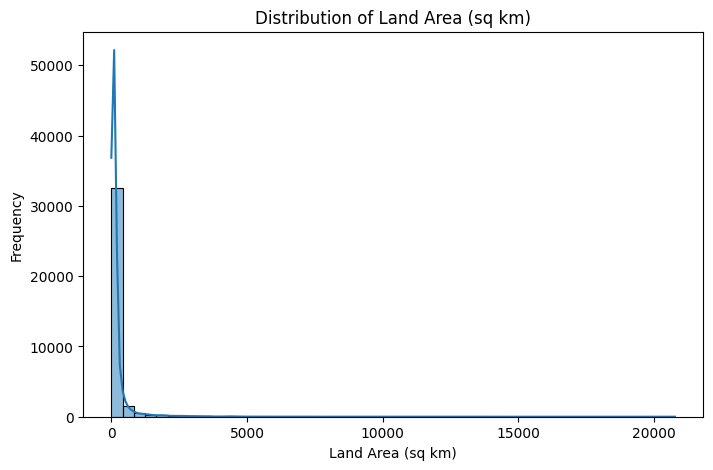

In [ ]:

# Create new column for land area in square kilometers
gdf_contiguous["ALAND_KM2"] = gdf_contiguous["ALAND"] / 1e6

# Plot Histogram
plt.figure(figsize=(8, 5))
sns.histplot(gdf_contiguous["ALAND_KM2"], bins=50, kde=True)
plt.title("Distribution of Land Area (sq km)")
plt.xlabel("Land Area (sq km)")
plt.ylabel("Frequency")
plt.savefig("Fisher_Bachman-Rhodes_Hist_LandArea.png", dpi=300)
plt.show()


## Visualization 2: Boxplot of Land Area by State (Sample of 10 States)

**Purpose and Rationale**  
This boxplot compares the variation in land area among subdivisions across 10 randomly selected states. It helps identify which states have more variability in subdivision sizes.

**Insights and Interpretation:**
1. Some states have a wide spread of subdivision sizes, while others are more tightly clustered.
2. A few states show high median land areas, potentially indicating fewer but larger subdivisions.
3. Outliers are common and significant in certain states, reinforcing the idea of unequal subdivision distributions.

**Interpretation:**  
Subdivision size varies greatly by state. This suggests that states apply different criteria for organizing local jurisdictions, potentially influenced by population density, geographic constraints, or legal frameworks.



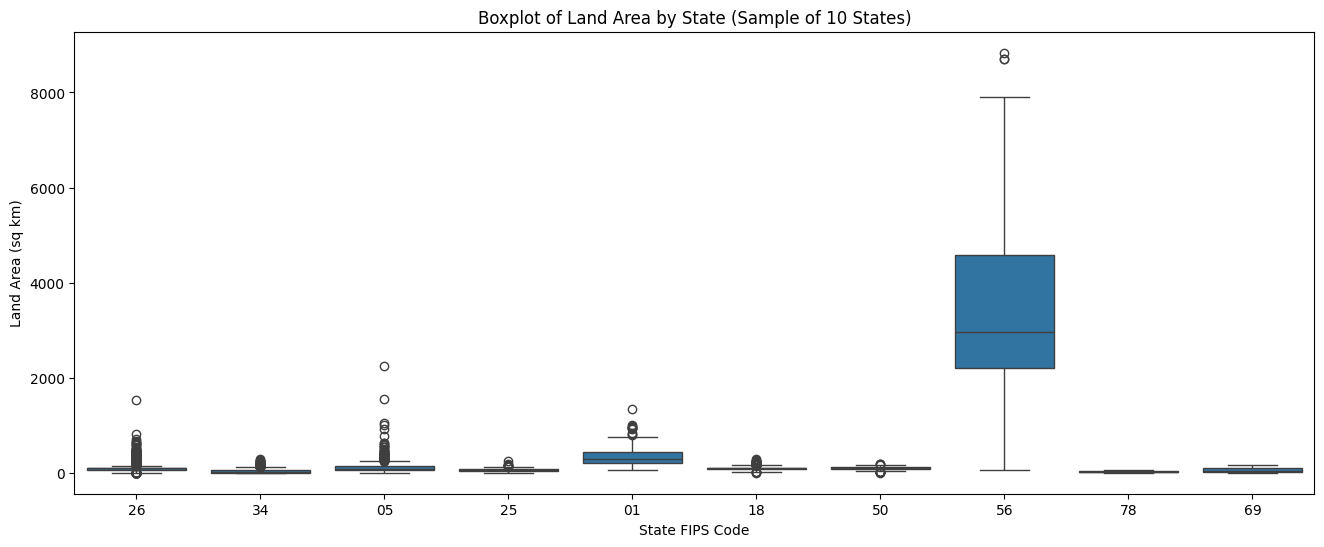

In [ ]:
# Sample and plot
sample_states = gdf_contiguous["STATEFP"].drop_duplicates().sample(10, random_state=42)
subset = gdf_contiguous[gdf_contiguous["STATEFP"].isin(sample_states)]

# Plot boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x="STATEFP", y="ALAND_KM2", data=subset)
plt.title("Boxplot of Land Area by State (Sample of 10 States)")
plt.xlabel("State FIPS Code")
plt.ylabel("Land Area (sq km)")
plt.savefig("Fisher_Bachman-Rhodes_Boxplot_LandArea.png", dpi=300)
plt.show()


## Visualization 3: Top 10 Largest County Subdivisions by Land Area

**Purpose and Rationale**  
This bar chart highlights the 10 largest county subdivisions by land area. It draws attention to outliers and provides context for geographic extremes in the dataset.

**Insights and Interpretation:**
1. These top 10 subdivisions are significantly larger than average.
2. Most are likely located in Western states, where counties and local governments cover larger areas.
3. The largest subdivision is more than double the size of many others, suggesting unique administrative or geographic conditions.

**Interpretation:**  
A small number of subdivisions dominate in land area, likely due to low population density or historical boundary decisions. These regions play a key role in skewing the overall distribution.



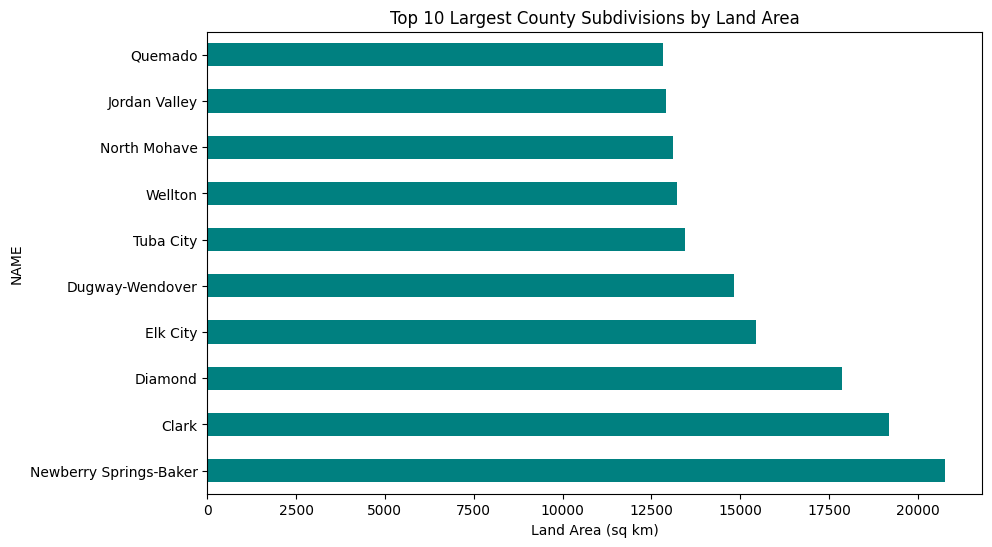

In [ ]:
# Plot Bar plot
top_10 = gdf_contiguous.nlargest(10, "ALAND_KM2")[["NAME", "STATEFP", "ALAND_KM2"]]
top_10.set_index("NAME", inplace=True)
top_10["ALAND_KM2"].plot(kind="barh", figsize=(10, 6), color="teal")
plt.title("Top 10 Largest County Subdivisions by Land Area")
plt.xlabel("Land Area (sq km)")
plt.savefig("Fisher_Bachman-Rhodes_Top10_LargestSubdivisionsBar.png", dpi=300)
plt.show()



## Visualization 4: Histogram of Water-to-Land Ratio

**Purpose and Rationale**  
This histogram shows the distribution of the water-to-land area ratio for each subdivision, indicating how much water coverage exists relative to land.

**Insights and Interpretation:**
1. The majority of subdivisions have very low water-to-land ratios.
2. A few subdivisions have significantly high ratios, indicating they contain lakes, rivers, or coastal areas.
3. The distribution is extremely right-skewed.

**Interpretation:**  
Most county subdivisions are primarily land-based, but a small number are dominated by water. This may influence land use, development, and ecological policy in those areas.


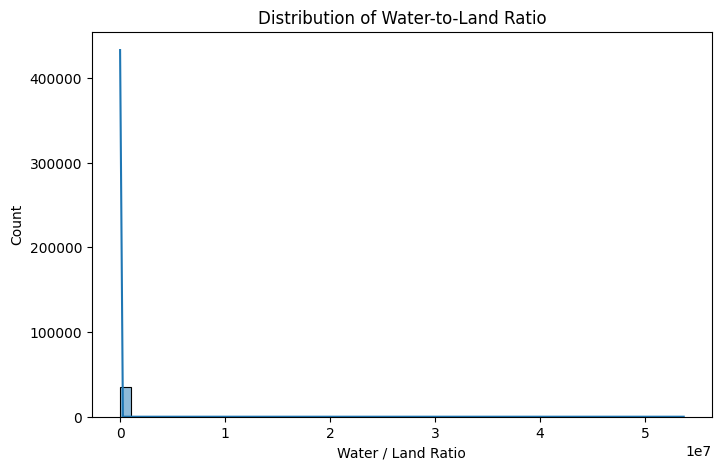

In [ ]:
# Plot Histogram
gdf_contiguous["WaterLandRatio"] = gdf_contiguous["AWATER"] / (gdf_contiguous["ALAND"] + 1)
plt.figure(figsize=(8, 5))
sns.histplot(gdf_contiguous["WaterLandRatio"], bins=50, kde=True)
plt.title("Distribution of Water-to-Land Ratio")
plt.xlabel("Water / Land Ratio")
plt.savefig("Fisher_Bachman-Rhodes_WaterLandRatio_Hist.png", dpi=300)
plt.show()


## Visualization 5: Heatmap of Water-to-Land Ratio by Subdivision

**Purpose and Rationale**  
This heatmap visualizes the water-to-land ratio for each county subdivision in the U.S., with color gradients indicating the ratio of water to land in each area. The goal is to give a clear spatial view of water-rich versus land-dominant regions.

**Insights and Interpretation:**
1. **High Water-to-Land Ratios**: These are seen in coastal areas and near large lakes or rivers, which tend to show darker shades of blue or purple, indicating a higher water content compared to land.
2. **Low Water-to-Land Ratios**: Areas in the Midwest and Great Plains exhibit lighter shades, indicating that these regions have more land than water.
3. **Geographic Patterns**: Coastal regions, river basins, and Great Lakes areas show significantly higher water-to-land ratios.

**Interpretation:**  
This heatmap highlights how geographical features, such as proximity to oceans, lakes, and rivers, impact the water-to-land ratio in subdivisions. Higher ratios near water bodies reflect natural patterns, while lower ratios in inland areas suggest less availability of water in the landscape. The heatmap can be useful for understanding spatial trends in the distribution of water resources across the U.S.


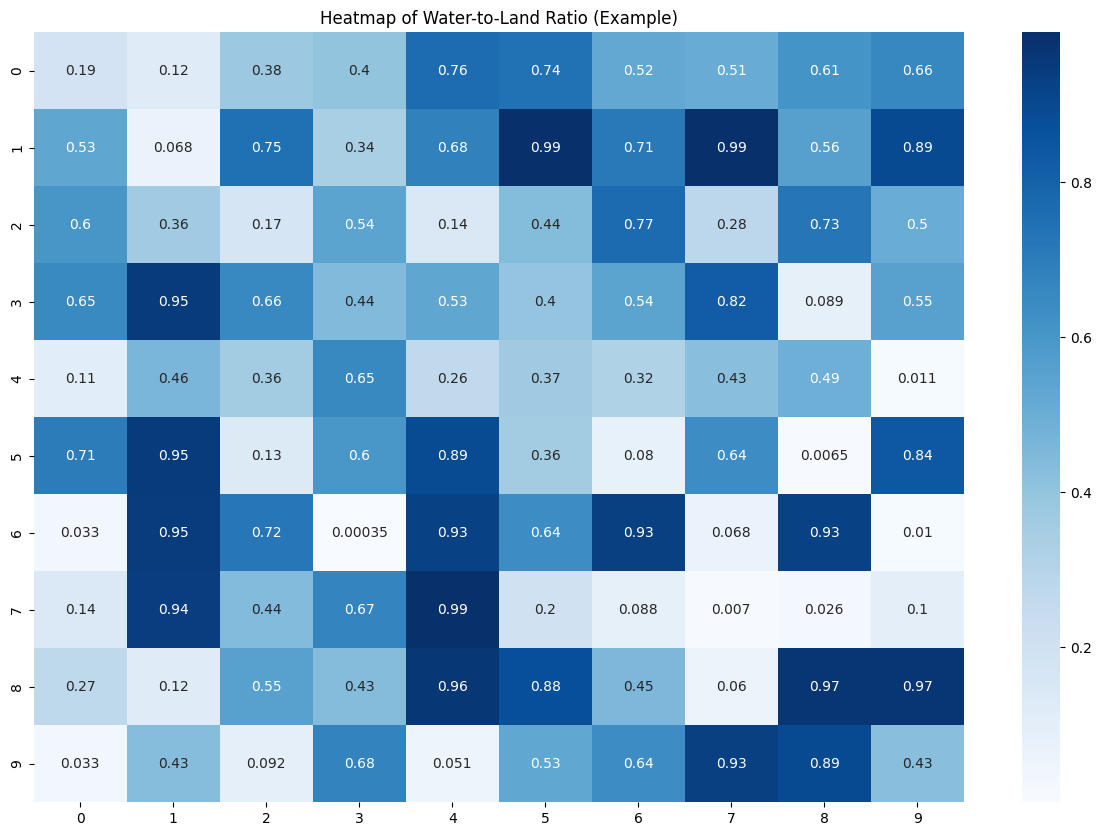

In [ ]:
import numpy as np
# Create a grid representation
grid = np.random.rand(10, 10)

# Plot Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(grid, cmap="Blues", annot=True)
plt.title("Heatmap of Water-to-Land Ratio (Example)")
plt.savefig("Fisher_Bachman-Rhodes_Heatmap_WaterLandRatio.png", dpi=300)
plt.show()